In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import plotly.express as px
import plotly.io as pio

from joblib import dump

pio.renderers.default = "png"
config = dict({'scrollZoom': True})

In [3]:
gdp_data = pd.read_csv('D:/ML_data/gdp/data.csv')
gdp_data = gdp_data.fillna(0)
gdp_data = gdp_data.drop(columns = 'Country Code')

In [4]:
imports_data = pd.read_csv('D:/ML_data/imports/data.csv')
imports_data = imports_data.fillna(0)
imports_data = imports_data.drop(columns = 'Country Code')

In [16]:
population_data = pd.read_csv('D:/ML_data/population/data.csv')
population_data = population_data.fillna(0)
population_data = population_data.drop(columns = 'Country Code')

In [5]:
canada_gdp = gdp_data[gdp_data['Country Name'] == 'Canada']
aus_gdp = gdp_data[gdp_data['Country Name'] == 'Australia']

canada_gdp = canada_gdp.T
aus_gdp = aus_gdp.T

In [6]:
canada_imports = imports_data[imports_data['Country Name'] == 'Canada']
aus_imports = imports_data[imports_data['Country Name'] == 'Australia']

canada_imports = canada_imports.T
aus_imports = aus_imports.T

In [17]:
canada_pop = population_data[population_data['Country Name'] == 'Canada']
aus_pop = population_data[population_data['Country Name'] == 'Australia']

canada_pop = canada_pop.T
aus_pop = aus_pop.T

In [7]:
values_can = canada_gdp.drop(['Indicator Name', 'Country Name', 'Indicator Code'], axis=0)[35]
values_aus = aus_gdp.drop(['Indicator Name', 'Country Name', 'Indicator Code'], axis=0)[13]

In [8]:
values_can2 = canada_imports.drop(['Indicator Name', 'Country Name', 'Indicator Code'], axis=0)[35]
values_aus2 = aus_imports.drop(['Indicator Name', 'Country Name', 'Indicator Code'], axis=0)[13]

In [18]:
values_can3 = canada_pop.drop(['Indicator Name', 'Country Name', 'Indicator Code'], axis=0)[35]
values_aus3 = aus_pop.drop(['Indicator Name', 'Country Name', 'Indicator Code'], axis=0)[13]

In [9]:
years = []
x = 1960
for i in range(61):
    years.append(x)
    x += 1
len(years)

61

In [10]:
gdp_canada_final = pd.DataFrame({'Country': ['Canada']*61, 'GDP': values_can, 'Year': years})
gdp_aus_final = pd.DataFrame({'Country': ['Australia']*61, 'GDP': values_aus, 'Year': years})

In [11]:
full_gdp = pd.concat([gdp_aus_final, gdp_canada_final])

In [40]:
imports_canada_final = pd.DataFrame({'Country': ['Canada']*61, 'Imports of Goods and Services (% GDP)': values_can2, 'Year': years})[1:]
imports_aus_final = pd.DataFrame({'Country': ['Australia']*61, 'Imports of Goods and Services (% GDP)': values_aus2, 'Year': years})[1:]

In [41]:
full_imports = pd.concat([imports_aus_final, imports_canada_final])


In [42]:
pop_canada_final = pd.DataFrame({'Country': ['Canada']*61, 'Population': values_can3, 'Year': years})
pop_aus_final = pd.DataFrame({'Country': ['Australia']*61, 'Population': values_aus3, 'Year': years})

In [43]:
full_pop = pd.concat([pop_aus_final, pop_canada_final])

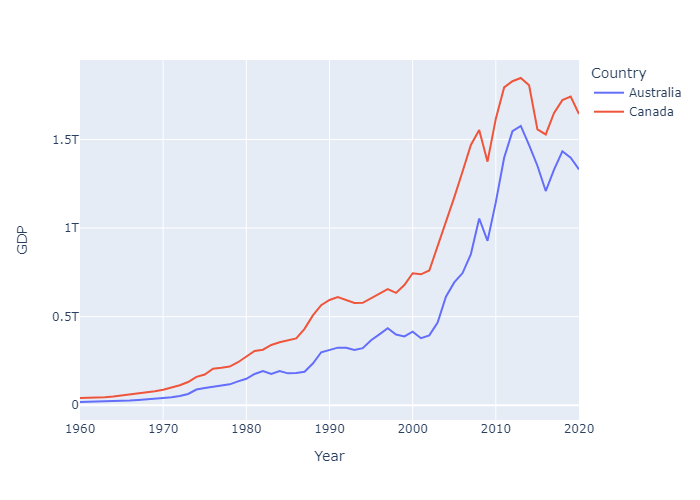

In [68]:
fig = px.line(full_gdp, x='Year', y='GDP', color='Country')
fig.show()

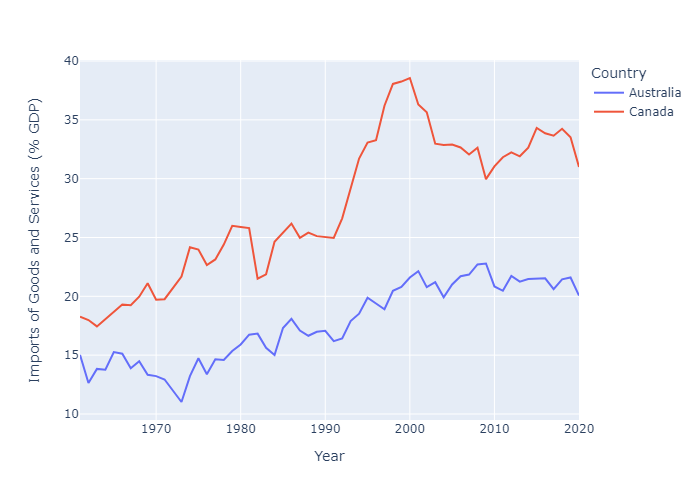

In [69]:
fig = px.line(full_imports, x='Year', y='Imports of Goods and Services (% GDP)', color='Country')
fig.show()

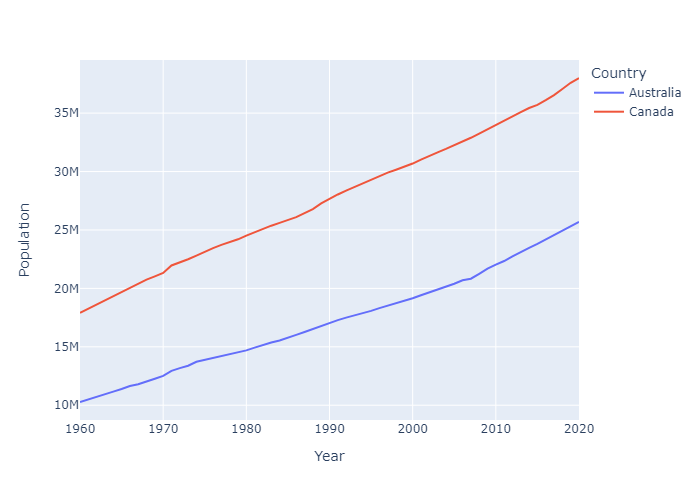

In [70]:
fig = px.line(full_pop, x='Year', y='Population', color='Country')
fig.show()

In [48]:
full_gdp.to_csv('gdp.csv')
full_imports.to_csv('imports.csv')
full_pop.to_csv('population.csv')

In [73]:
def model(data, value):
    X = data['Year']
    y = data[value]

    X = np.array(X).reshape(-1,1)
    X = np.array(X).reshape(-1,1)

    lr = LinearRegression()
    lr.fit(X, y)
    print('Predicting: ', value)
    print('Model Coef: ', lr.coef_)
    print('Prediciting for 2022: ', lr.coef_ * 2022)

In [75]:
model(gdp_canada_final, 'GDP')

Predicting:  GDP
Model Coef:  [3.21350643e+10]
Prediciting for 2022:  [6.49771001e+13]


In [76]:
model(gdp_aus_final, 'GDP')

Predicting:  GDP
Model Coef:  [2.47982485e+10]
Prediciting for 2022:  [5.01420585e+13]
